<a href="https://colab.research.google.com/github/yaarikk21/DA-course/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [9]:
!pip install mysql-connector-python

In [10]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [47]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees'
)

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [29]:
cursor = con.cursor()

cursor.execute('''
  select max(hire_date), min(hire_date)
  from employees
''')

cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [13]:
import pandas as pd

In [14]:
cursor = con.cursor()

cursor.execute('''
  select emp_no, salary, from_date, to_date
  from salaries as S1
  where to_date = (
    select max(to_date)
    from salaries as S2
    where S1.emp_no = S2.emp_no
  )
''')
res = pd.DataFrame(cursor.fetchall())
res.head(3)

,0,1,2,3
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


In [15]:
field_names = [i[0] for i in cursor.description]

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [20]:
#тип даних подивився через DBeaver і він дорівнює date

cursor = con.cursor()

cursor.execute('''
  select to_date
  from salaries
''')

res = pd.DataFrame(cursor.fetchall(), columns=['to_date'])
print(res['to_date'].dtype)

date_with_999 = (res['to_date'] == pd.Timestamp('9999-01-01')).sum()
date_with_not999 = (res['to_date'] != pd.Timestamp('9999-01-01')).sum()
print(f"Кількість значень to_date рівних 9999-01-01: {date_with_999}")
print(f"Кількість значень to_dat' не рівних 9999-01-01: {date_with_not999}")

object
Кількість значень to_date рівних 9999-01-01: 0
Кількість значень to_dat' не рівних 9999-01-01: 2844047


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [22]:
import matplotlib.pyplot as plt

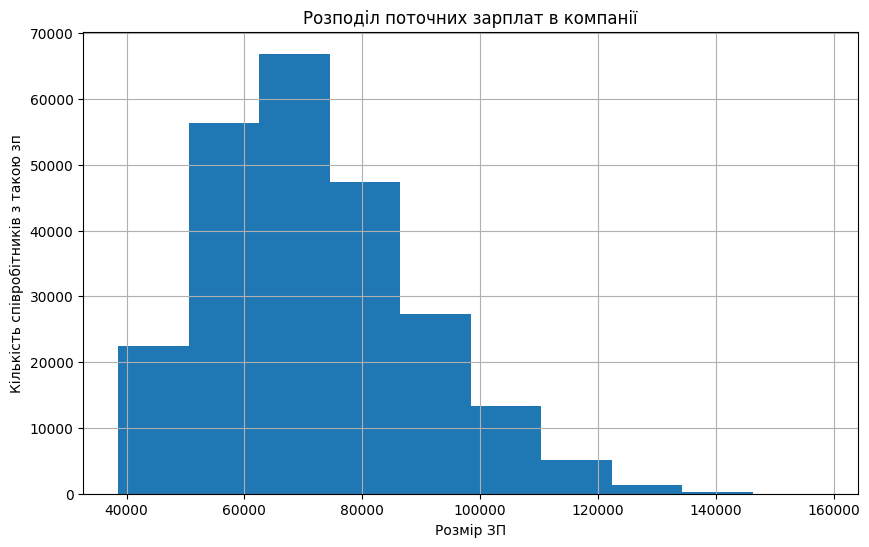

In [50]:
cursor = con.cursor()

histogram = cursor.execute('''
  select salary
  from salaries
  where to_date = '9999-01-01'
''')

res = pd.DataFrame(cursor.fetchall(), columns=['salary'])

plt.figure(figsize=(10, 6))
plt.hist(res['salary'])

plt.title('Розподіл поточних зарплат в компанії')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників з такою зп')
plt.grid(True)

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [51]:
con.close()